In [1]:
import numpy as np
import scipy.misc, math
from PIL import Image
from pylab import *

## Histogram

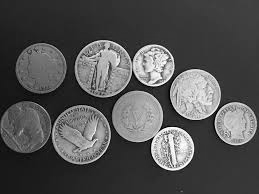

In [2]:
# Open coins jpeg image
coin_img_path = 'images/images/coins.jpg'
coin_img = Image.open(coin_img_path).convert('L')
coin_img

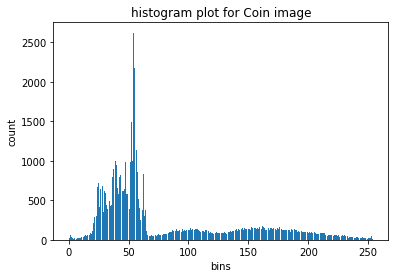

In [3]:
coin_img_array = np.asarray(coin_img)
hist(coin_img_array.flatten(), 300)
xlabel("bins")
ylabel("count")
title("histogram plot for Coin image")
show()

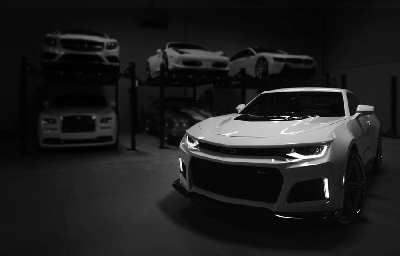

In [4]:
# Open Car jpeg image
car_img_path = 'images/images/car.jpg'
car_img = Image.open(car_img_path).convert('L')
car_img.resize((400, 256))

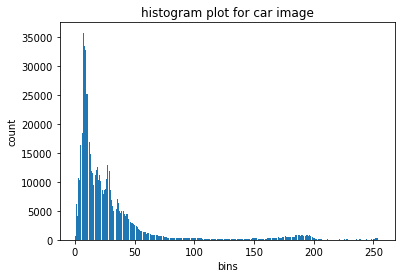

In [5]:
car_img_array = np.asarray(car_img)
hist(car_img_array.flatten(), 300)
xlabel("bins")
ylabel("count")
title("histogram plot for car image")
show()

## Histogram Equalizing

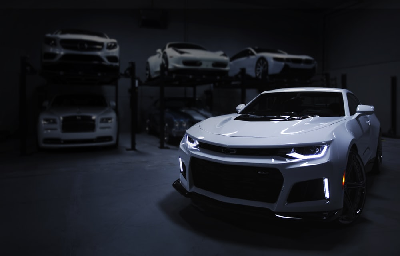

In [6]:
car_img_path = 'images/images/car.jpg'
car_img = Image.open(car_img_path)
car_img = car_img.resize((400, 256))
car_img

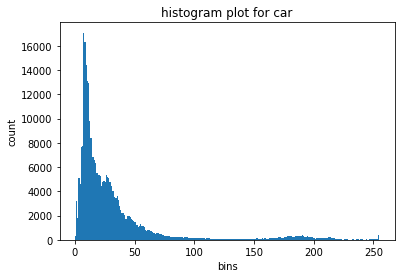

In [7]:
car_img_array = np.asarray(car_img)
hist(car_img_array.flatten(), 256)
xlabel("bins")
ylabel("count")
title("histogram plot for car")
show()

In [8]:
# Flatten the image
f1 = car_img_array.flatten()

In [9]:
# Calculate the histogram of the image
histo, bins = (np.histogram(car_img_array, 256, [0,255]))

In [10]:
# Do the cummulative sum of histo
cdf = histo.cumsum()
# Print the cdf
cdf

array([   327,   3528,   5338,  10431,  15014,  22695,  30434,  47520,
        63853,  78236,  91321, 104296, 114123, 122560, 129411, 136205,
       142766, 149077, 154555, 159895, 165268, 170508, 174944, 179707,
       184528, 189302, 194608, 199776, 204903, 209638, 214082, 218093,
       222095, 225667, 229100, 232715, 235996, 238825, 241280, 243474,
       245668, 247723, 249458, 251188, 253118, 255099, 256949, 258632,
       260294, 261838, 263302, 264500, 265684, 266724, 267883, 269178,
       270317, 271436, 272522, 273361, 274065, 274837, 275615, 276360,
       277060, 277698, 278273, 278779, 279303, 279861, 280411, 280918,
       281360, 281790, 282192, 282535, 282888, 283225, 283509, 283782,
       284045, 284293, 284534, 284773, 285028, 285280, 285529, 285773,
       286013, 286221, 286425, 286609, 286819, 287011, 287210, 287381,
       287566, 287746, 287929, 288114, 288264, 288430, 288592, 288755,
       288906, 289070, 289208, 289364, 289484, 289588, 289710, 289823,
      

In [11]:
# Add mask for 0 value
cdf_m = np.ma.masked_equal(cdf, 0)
# print the masked cdf value
cdf_m

masked_array(data=[   327,   3528,   5338,  10431,  15014,  22695,  30434,
                    47520,  63853,  78236,  91321, 104296, 114123, 122560,
                   129411, 136205, 142766, 149077, 154555, 159895, 165268,
                   170508, 174944, 179707, 184528, 189302, 194608, 199776,
                   204903, 209638, 214082, 218093, 222095, 225667, 229100,
                   232715, 235996, 238825, 241280, 243474, 245668, 247723,
                   249458, 251188, 253118, 255099, 256949, 258632, 260294,
                   261838, 263302, 264500, 265684, 266724, 267883, 269178,
                   270317, 271436, 272522, 273361, 274065, 274837, 275615,
                   276360, 277060, 277698, 278273, 278779, 279303, 279861,
                   280411, 280918, 281360, 281790, 282192, 282535, 282888,
                   283225, 283509, 283782, 284045, 284293, 284534, 284773,
                   285028, 285280, 285529, 285773, 286013, 286221, 286425,
                   286609

In [12]:
# Subtract each value of in cdf_m with its minimum value and multiply by 255
num_cdf_m = (cdf_m - cdf_m.min()) * 255
num_cdf_m

masked_array(data=[       0,   816255,  1277805,  2576520,  3745185,
                    5703840,  7677285, 12034215, 16199130, 19866795,
                   23203470, 26512095, 29017980, 31169415, 32916420,
                   34648890, 36321945, 37931250, 39328140, 40689840,
                   42059955, 43396155, 44527335, 45741900, 46971255,
                   48188625, 49541655, 50859495, 52166880, 53374305,
                   54507525, 55530330, 56550840, 57461700, 58337115,
                   59258940, 60095595, 60816990, 61443015, 62002485,
                   62561955, 63085980, 63528405, 63969555, 64461705,
                   64966860, 65438610, 65867775, 66291585, 66685305,
                   67058625, 67364115, 67666035, 67931235, 68226780,
                   68557005, 68847450, 69132795, 69409725, 69623670,
                   69803190, 70000050, 70198440, 70388415, 70566915,
                   70729605, 70876230, 71005260, 71138880, 71281170,
                   71421420, 71550

In [13]:
# Calculate differecen of max and min value of cdf
den_cdf_m = (cdf_m.max() - cdf_m.min())
den_cdf_m

306873

In [14]:
# Divide 
cdf_m = num_cdf_m / den_cdf_m
cdf_m

masked_array(data=[0.0, 2.6599114291579906, 4.163953818028957,
                   8.396046573012288, 12.204348378645237,
                   18.586972460920315, 25.017792376650927,
                   39.21562014253453, 52.78773303614199,
                   64.73946877046856, 75.61261499056613,
                   86.39435531962734, 94.56022523975716,
                   101.57105708224574, 107.26398216851922,
                   112.90954238398295, 118.36148830297876,
                   123.6056935605283, 128.15770693413887,
                   132.59504746263113, 137.05980975843428,
                   141.414054022348, 145.10020431905056,
                   149.0580794009248, 153.0641503162546,
                   157.0311659872325, 161.44025378576805,
                   165.73466873918525, 169.9950142241253,
                   173.92962235191757, 177.62242034978638,
                   180.9554115220303, 184.2809240304621,
                   187.24912260120635, 190.10181736418647,
         

In [15]:
# Fill the masked value with 0
# Convert float into 8 bit integer
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
cdf

array([  0,   2,   4,   8,  12,  18,  25,  39,  52,  64,  75,  86,  94,
       101, 107, 112, 118, 123, 128, 132, 137, 141, 145, 149, 153, 157,
       161, 165, 169, 173, 177, 180, 184, 187, 190, 193, 195, 198, 200,
       202, 203, 205, 207, 208, 210, 211, 213, 214, 216, 217, 218, 219,
       220, 221, 222, 223, 224, 225, 226, 226, 227, 228, 228, 229, 229,
       230, 230, 231, 231, 232, 232, 233, 233, 233, 234, 234, 234, 235,
       235, 235, 235, 235, 236, 236, 236, 236, 236, 237, 237, 237, 237,
       237, 238, 238, 238, 238, 238, 238, 238, 239, 239, 239, 239, 239,
       239, 239, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240,
       241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241,
       241, 241, 241, 241, 241, 242, 242, 242, 242, 242, 242, 242, 242,
       242, 242, 242, 242, 242, 242, 242, 243, 243, 243, 243, 243, 243,
       243, 243, 243, 243, 243, 244, 244, 244, 244, 244, 244, 244, 244,
       244, 245, 245, 245, 245, 245, 245, 245, 246, 246, 246, 24

In [16]:
# Read the calculated cdf value for each pixel for f1
car_image_array_equ = cdf[f1]

In [17]:
len(f1), len(cdf)

(307200, 256)

In [18]:
# Convert new array with the shape of original image
car_image_array_equ = np.reshape(car_image_array_equ, car_img_array.shape)

In [19]:
# Convert array as image
car_image_equ = Image.fromarray(car_image_array_equ)

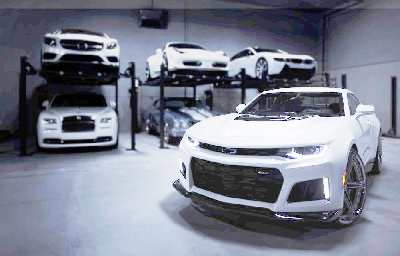

In [20]:
# Plot the equalized image
car_image_equ

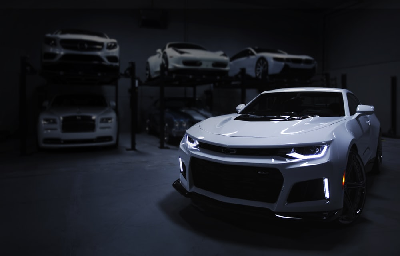

In [21]:
# Plot the original image
car_img

### Plot the histogram

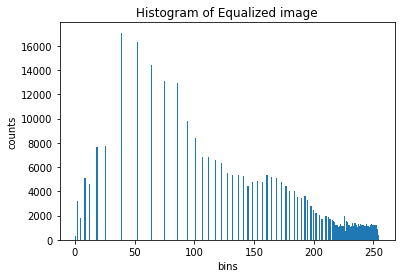

In [22]:
figure()
hist(car_image_array_equ.flatten(), 256)
xlabel("bins")
ylabel("counts")
title("Histogram of Equalized image")
show()

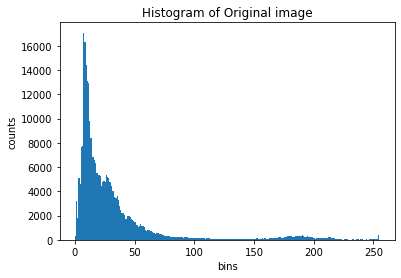

In [23]:
figure()
hist(car_img_array.flatten(), 256)
xlabel("bins")
ylabel("counts")
title("Histogram of Original image")
show()